In [1]:
import pandas as pd
import gurobipy as gp
import numpy as np
from gurobipy import Model, GRB
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
#Load data
suits_data = pd.read_excel("NLP.xlsx", sheet_name="Suits", header=None)

In [3]:
suits_data

,0,1,2
0,Historical Data for Prices and Demand for Sull...,NaN,NaN
1,NaN,NaN,NaN
2,Period,Price,Demand
3,1,360,284
4,2,340,320
5,3,380,251
6,4,410,199
7,5,320,385
8,6,350,298
9,7,400,217


In [4]:
prices = suits_data.iloc[3:23, 1].tolist()  #prices
demand = suits_data.iloc[3:23, 2].tolist()  #demand
prices

[360,
 340,
 380,
 410,
 320,
 350,
 400,
 370,
 340,
 450,
 400,
 380,
 370,
 315,
 340,
 325,
 370,
 380,
 400,
 385]

In [5]:
# Fit a demand function using a regression model
b,a = np.polyfit(prices, demand,1)
print(a,b)

985.2329975527856 -1.9227704740766027


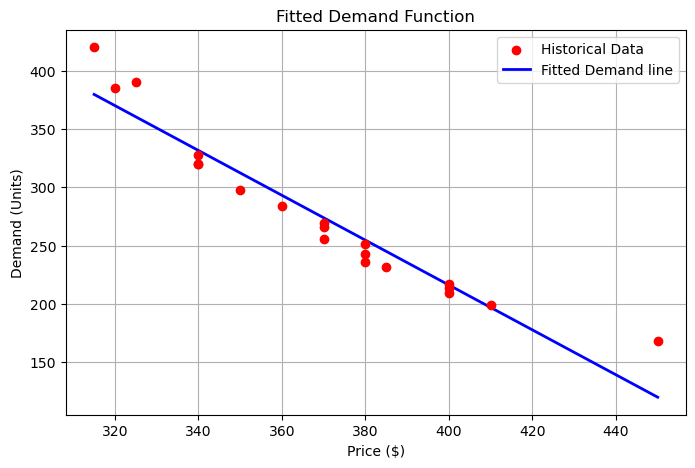

In [6]:
# Generate fitted demand values
price_range = np.linspace(min(prices), max(prices), 100)  # Smooth range of prices
fitted_demand = a+b*price_range  # Compute fitted demand

# Plot original data and fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(prices, demand, color='red', label="Historical Data", zorder=3)  # Scatter plot of actual data
plt.plot(price_range, fitted_demand, label="Fitted Demand line", color='blue', linewidth=2)  # Fitted curve
plt.xlabel("Price ($)")
plt.ylabel("Demand (Units)")
plt.title("Fitted Demand Function")
plt.legend()
plt.grid(True)
plt.show()

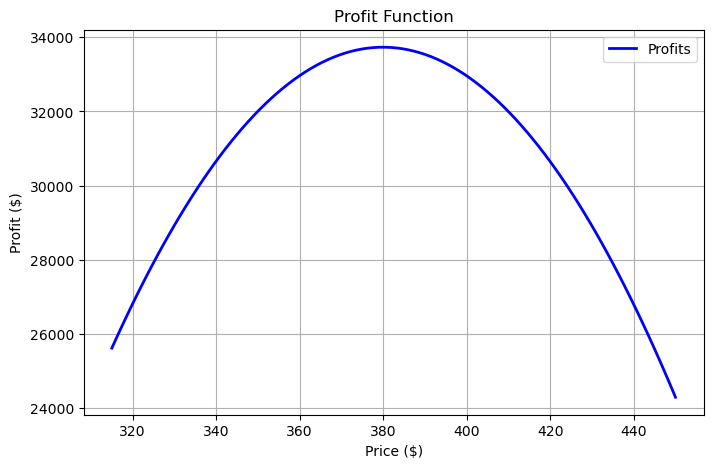

In [7]:
# Fit the profit function
def profit_function(p, a, b):
    demand = a + p*b
    profit = (p-320)*demand + 25*2*demand + 15*1.5*demand
    return profit

profit = profit_function(price_range, a, b)  # Compute profits

# Plot original data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(price_range, profit, label="Profits", color='blue', linewidth=2)  # Fitted curve
plt.xlabel("Price ($)")
plt.ylabel("Profit ($)")
plt.title("Profit Function")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Gurobi Model
model = gp.Model("Sullivans_Pricing")

# Decision Variable: Suit Price
P = model.addVar(vtype=GRB.CONTINUOUS, name="Suit_Price", lb=320)

# Demand function in terms of decision variable
D = a + P*b  # Estimated demand based on price P

# Contribution per product
profit_suit = (P - 320) * D  # Profit from suits
profit_shirts = (25 * 2) * D  # Profit from shirts
profit_ties = (15 * 1.5) * D  # Profit from ties

# Objective: Maximize total profit
total_profit = profit_suit + profit_shirts + profit_ties
model.setObjective(total_profit, GRB.MAXIMIZE)


# Enable non-convex optimization
#model.Params.NonConvex = 2
#model.params.FuncNonlinear = 1

# Optimize
model.optimize()

# Print results
if model.status == GRB.OPTIMAL:
    print(f"Optimal Suit Price: ${P.X:.2f}")
    print(f"Expected Demand: {a + P.X*b:.2f} suits")
    print(f"Maximized Profit: ${model.ObjVal:.2f}")

Set parameter Username
Set parameter LicenseID to value 2722647
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0xb5b364b7
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+03, 1e+03]
  QObjective range [4e+00, 4e+00]
  Bounds range     [3e+02, 3e+02]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 3.37318833e+04
Optimal Suit Price: $379.95
Expected Demand: 254.67 suits
Maximized Profit: $33731.88
